## 3D co-seismic displacement in separate plots

In [2]:
%matplotlib inline
import os
import numpy as np
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
from mintpy.utils import readfile, utils as ut, plot as pp
from mintpy import view
plt.rcParams.update({'font.size': 12})

work_dir = os.path.expanduser('~/data/archives/2021MaduoEQ/data')
os.chdir(work_dir)
print('Go to directory:', work_dir)

# input files
S, N, W, E = 33.9, 35.4, 97.1, 99.7
dem_file = os.path.join(work_dir, '../DEM/demLat_N33_N36_Lon_E096_E101.dem')
enu_file = os.path.join(work_dir, 'dis_enu.h5')
rlat, rlon = 34.2, 97.3
print(f'reference point: N {float(rlat):.2f}, E {float(rlon):.2f}')

# main rupture trace
ll_file = os.path.join(work_dir, 'Main_rupture_LL.gmt')
faults = readfile.read_gmt_lonlat_file(ll_file)

Go to directory: /Users/yunjunz/data/archives/2021MaduoEQ/data
reference point: N 34.20, E 97.30
[==================================================] line 21 / 21 


view.py /Users/yunjunz/data/archives/2021MaduoEQ/data/dis_enu.h5 east -c RdBu -v -1.8 1.8 --noverbose --notitle --fontsize 12 --sub-lat 33.9 35.4 --sub-lon 97.1 99.7 -d /Users/yunjunz/data/archives/2021MaduoEQ/data/../DEM/demLat_N33_N36_Lon_E096_E101.dem --shade-max 7500 --scalebar 0.2 0.4 0.1 --cbar-nbins 6 --ref-lalo 34.2 97.3 --ref-size 3
view.py /Users/yunjunz/data/archives/2021MaduoEQ/data/dis_enu.h5 north -c RdBu -v -0.6 0.6 --noverbose --notitle --fontsize 12 --sub-lat 33.9 35.4 --sub-lon 97.1 99.7 -d /Users/yunjunz/data/archives/2021MaduoEQ/data/../DEM/demLat_N33_N36_Lon_E096_E101.dem --shade-max 7500 --scalebar 0.2 0.4 0.1 --cbar-nbins 6 --ref-lalo 34.2 97.3 --ref-size 3
view.py /Users/yunjunz/data/archives/2021MaduoEQ/data/dis_enu.h5 up -c RdBu -v -0.3 0.3 --noverbose --notitle --fontsize 12 --sub-lat 33.9 35.4 --sub-lon 97.1 99.7 -d /Users/yunjunz/data/archives/2021MaduoEQ/data/../DEM/demLat_N33_N36_Lon_E096_E101.dem --shade-max 7500 --scalebar 0.2 0.4 0.1 --cbar-nbins 6 --r

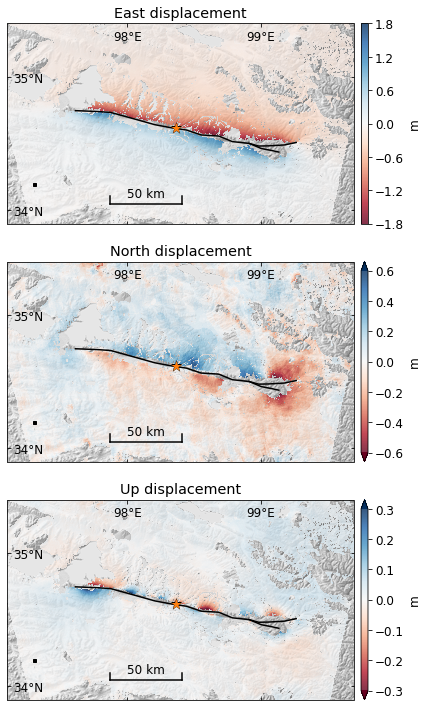

In [5]:
dset_list = ['East', 'North', 'Up']
vlim_list = [1.8, 0.6, 0.3]
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=[6, 10], subplot_kw=dict(projection=ccrs.PlateCarree()))

for ax, dset, vlim in zip(axs, dset_list, vlim_list):

    # prep displacement up
    cmd = f'view.py {enu_file} {dset.lower()} -c RdBu -v -{vlim} {vlim} --noverbose --notitle --fontsize 12 '
    cmd += f' --sub-lat {S} {N} --sub-lon {W} {E} -d {dem_file} --shade-max 7500 '
    cmd += ' --scalebar 0.2 0.4 0.1 --cbar-nbins 6 '
    cmd += f' --ref-lalo {rlat} {rlon} --ref-size 3 '
    dis_rg, atr, inps = view.prep_slice(cmd)

    # plot vert displacement
    ax, inps, im, cbar = view.plot_slice(ax, dis_rg, atr, inps)
    pp.draw_lalo_label(ax, inps.geo_box, lalo_step=inps.lalo_step, lalo_loc=[1, 0, 1, 0], lalo_max_num=inps.lalo_max_num,
                       font_size=inps.font_size, projection=inps.map_proj_obj, print_msg=inps.print_msg, lalo_offset=(-36, -20))

    # plot rupture traces, fault boundaries, hypocenter
    for i, fault in enumerate(faults):   ax.plot(fault[:,0], fault[:,1], '-', lw=1.5, color='k')
    ax.scatter(98.362, 34.620, s=12**2, marker='*', c='C1', edgecolors='k', lw=0.3, zorder=10)
    ax.set_title(f'{dset} displacement')
fig.tight_layout()

# output
out_fig = os.path.abspath('dis_enu.png')
print('save figure to file', out_fig)
plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=600)
plt.show()